<a href="https://colab.research.google.com/github/zahra-zarrabi/Audio_Classification_CNN/blob/main/make_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydub

In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.utils import make_chunks


In [ ]:
cd '/content/drive/MyDrive/audio_classification'

/content/drive/MyDrive/audio_classification


In [ ]:
voice = AudioSegment.from_file("audios/Zahra.opus")
voice

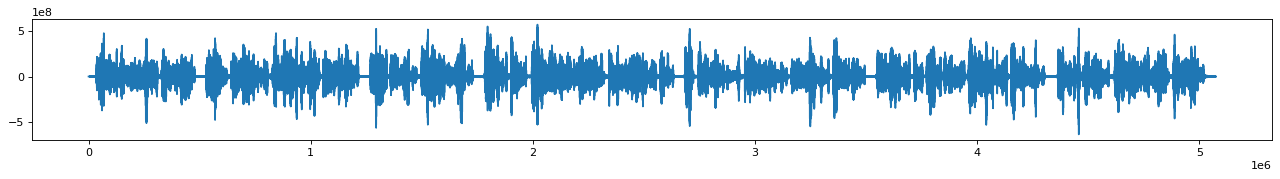

In [ ]:
array = voice.get_array_of_samples()
plt.figure(figsize=(20,2),dpi=80)
plt.plot(array)
plt.show()

## concatenate two files

In [ ]:
voice1 = AudioSegment.from_file("audios/mohammadali_1.ogg")
voice2 = AudioSegment.from_file("audios/mohammadali_2.ogg")
voice2 = AudioSegment.from_file("audios/Mohammadali_3.ogg")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/mohammadali.wav", format="wav", bitrate="192k")

# os.remove("audio/mohammadali_1.ogg")
# os.remove("audios/mohammadali_2.ogg")

<_io.BufferedRandom name='audios_raw/mohammadali.wav'>

In [ ]:
voice1 = AudioSegment.from_file("audios/morteza_1.m4a")
voice2 = AudioSegment.from_file("audios/morteza_2.m4a")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/morteza.wav", format="wav", bitrate="192k")

In [ ]:
voice1 = AudioSegment.from_file("audios/zeynab_1.ogg")
voice2 = AudioSegment.from_file("audios/zeynab_2.ogg")
voice2 = AudioSegment.from_file("audios/Zeynab_3.ogg")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/zeynab.wav", format="wav", bitrate="192k")


In [ ]:
voice1 = AudioSegment.from_file("audios/Alireza.ogg")
voice2 = AudioSegment.from_file("audios/alireza_2.ogg")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/alireza.wav", format="wav", bitrate="192k")


In [ ]:
voice1 = AudioSegment.from_file("audios/Maryam.ogg")
voice2 = AudioSegment.from_file("audios/maryam_2.ogg")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/maryam.wav", format="wav", bitrate="192k")


In [ ]:
voice1 = AudioSegment.from_file("audios/Nahid.ogg")
voice2 = AudioSegment.from_file("audios/nahid_2.ogg")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/nahid.wav", format="wav", bitrate="192k")


In [ ]:
voice1 = AudioSegment.from_file("audios/Parisa.ogg")
voice2 = AudioSegment.from_file("audios/parisa_2.ogg")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/parisa.wav", format="wav", bitrate="192k")


In [ ]:
voice1 = AudioSegment.from_file("audios/Zahra.opus")
voice2 = AudioSegment.from_file("audios/zahra_2.opus")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/zahra.wav", format="wav", bitrate="192k")


In [ ]:
voice1 = AudioSegment.from_file("audios/sajjad.ogg")
voice2 = AudioSegment.from_file("audios/Sajjad_2.ogg")

combined_voice = voice1 + voice2
combined_voice.export("audios_raw/sajjad.wav", format="wav", bitrate="192k")


In [ ]:
voice_s= AudioSegment.from_file("audios/Hosein.ogg")
voice_a= AudioSegment.from_file("audios/Amir.ogg")

voice_s.export("audios_raw/hosein.wav", format="wav", bitrate="192k")
voice_a.export("audios_raw/amir.wav", format="wav", bitrate="192k")


In [ ]:
# remove the silence
sound = AudioSegment.from_ogg("audios_raw/sajjad.wav")
audio_part = split_on_silence(sound, min_silence_len=2000, silence_thresh=-45)
audio_part

In [ ]:
combined_audio = sum(audio_part)
combined_audio

In [ ]:
audios_path = "audios_raw"
audios_remove_silence_path = "audios_remove_silence"
Path(audios_remove_silence_path).mkdir(exist_ok=True)

for file in os.listdir(audios_path):
    file_path = os.path.join(audios_path, file)
    voice = AudioSegment.from_file(file_path)

    # remove silence
    voice_part = split_on_silence(voice, min_silence_len = 2000, silence_thresh = -45)
    combined_voice = sum(voice_part)
    filename = Path(file_path).stem
    output_file_path = os.path.join(audios_remove_silence_path, filename + ".wav")
    combined_voice.export(output_file_path, format="wav", bitrate="32k")

In [ ]:
# Detach voice
audios_remove_silence_path = "audios_remove_silence"
dataset_path = "dataset"
Path(dataset_path).mkdir(exist_ok=True)

for file in os.listdir(audios_remove_silence_path):
  file_path = os.path.join(audios_remove_silence_path, file)
  voice = AudioSegment.from_file(file_path)

  chuncks = make_chunks(voice, 1000)

  name = Path(file).stem
  Path(os.path.join(dataset_path,name)).mkdir(exist_ok=True)
  for i, chunk in enumerate(chuncks):
    if len(chunk) < 1000:
      continue
    output_path = os.path.join(dataset_path,name, name+f"_{i}.wav")
    chunk.export(output_path, format="wav") 